In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn import svm
from sklearn import metrics
import PIL
from PIL import Image
from numpy import asarray
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

#Data Reading and Processing 

First Reading The data from labels (Defected or not Defected)

In [ ]:
file_path = '/content/drive/MyDrive/CV Hackathon/Training Data/Labels/Train_DefectType_PrithviAI.csv'
df = pd.read_csv(file_path)
df_array=df.to_numpy()

In [ ]:
df_array.shape

(4051, 2)

In [ ]:
df_array[1][1]

0

In [ ]:
dataset_bad = [] 
for i in df_array :
  if i[1]== 1:


    for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")):
      if i[0]== file:
      
  
        x = os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")

        path = os.path.join(x, file)
        img = cv2.imread(path)
        resized_image = cv2.resize(img, (512,125)) 
        dataset_bad.append([file,resized_image])   
  
      
  

In [ ]:
dataset_bad[2]

['000008.png', array([[[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[12, 12, 12],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[12, 12, 12],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8)]

In [ ]:
count_bad=len(dataset_bad)

In [ ]:
count_bad

612

In [ ]:
dataset_good = [] 
for i in df_array :
  if i[1]== 0:


    for file in os.listdir(os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")):
      if i[0]== file:
      
  
        x = os.path.join("/content/drive/MyDrive/CV Hackathon/Training Data/Images Unzipped/Images")

        path = os.path.join(x, file)
        img = cv2.imread(path)
        resized_image = cv2.resize(img, (512,125)) 
        dataset_good.append([file,resized_image])   
  
       

In [ ]:
file_path = '/content/drive/MyDrive/CV Hackathon/Training Data/Labels/Train_DefectBoxes_PrithviAI.csv'
df_boundingbox = pd.read_csv(file_path)
df_boundingbox_array=df_boundingbox.to_numpy()

In [ ]:
df_boundingbox

,image_id,X,Y,W,H
0,000003.png,0.471313,0.7165,0.776611,0.267
1,000005.png,0.512085,0.5600,0.665771,0.234
2,000008.png,0.493286,0.7330,0.732666,0.220
3,000010.png,0.505615,0.0900,0.682129,0.134
4,000013.png,0.474609,0.5435,0.760254,0.253
...,...,...,...,...,...
1191,img_97.jpg,0.485352,0.6905,0.593750,0.231
1192,img_979.jpg,0.513672,0.9280,0.585938,0.144
1193,img_985.jpg,0.407471,0.2490,0.440918,0.250
1194,img_985.jpg,0.756958,0.2000,0.175537,0.200


In [ ]:
df_boundingbox_array

array([['000003.png', 0.47131300000000004, 0.7165, 0.7766109999999999,
        0.267],
       ['000005.png', 0.512085, 0.56, 0.665771, 0.23399999999999999],
       ['000008.png', 0.49328599999999995, 0.733, 0.732666, 0.22],
       ...,
       ['img_985.jpg', 0.407471, 0.249, 0.44091800000000003, 0.25],
       ['img_985.jpg', 0.756958, 0.2, 0.175537, 0.2],
       ['img_990.jpg', 0.520386, 0.6245, 0.663818, 0.175]], dtype=object)

In [ ]:
df_boundingbox_array_duplicate=df_boundingbox_array

In [ ]:
boundingbox_list=df_boundingbox_array.tolist()

In [ ]:
boundingbox_list

In [ ]:
imagedata_boundingbox=[]

x_coordinate=[]
y_coordinate=[]
w=[]
h=[]
coordinates_boundingbox=[]
for i in boundingbox_list:
  for j in dataset_bad:
    if i[0]==j[0]:
      imagedata_boundingbox.append(j[1])
      coordinates_boundingbox.append(i[1:5])
     
      x_coordinate.append(i[1])
      y_coordinate.append(i[2])
      w.append(i[3])
      h.append(i[4])


      

In [ ]:
boundingbox_list[0]

['000003.png',
 0.47131300000000004,
 0.7165,
 0.7766109999999999,
 0.267,
 array([[[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [17, 17, 17],
         [19, 19, 19]],
 
        [[12, 12, 12],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [19, 19, 19]],
 
        ...,
 
        [[12, 12, 12],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
      

2658

In [ ]:
counter=0

good_data=[]
for i in dataset_good:
  
  
  while counter < int(count_bad) :
      good_data.append([i[1],0])
      counter=counter+1
    

In [ ]:
len(good_data)

612

In [ ]:
test_good_data=[]
for i in dataset_good[613:]:
  test_good_data.append([i[1],0])

In [ ]:
good_data[0]

[array([[[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [17, 17, 17]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8), 0]

In [ ]:
bad_data=[]
for i in dataset_bad:
  bad_data.append([i[1],1])

In [ ]:
bad_data[0]

[array([[[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [17, 17, 17],
         [19, 19, 19]],
 
        [[12, 12, 12],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [19, 19, 19]],
 
        ...,
 
        [[12, 12, 12],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8), 1]

In [ ]:
good_data[0]

[array([[[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [17, 17, 17]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8), 0]

In [ ]:
final_dataset=good_data+bad_data


In [ ]:
final_dataset[0]

[array([[[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [17, 17, 17]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8), 0]

In [ ]:
final_dataset[0]

[array([[[13, 13, 13],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [17, 17, 17]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [12, 12, 12],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [18, 18, 18],
         [18, 18, 18]]], dtype=uint8), 0]

In [ ]:
import random
random.shuffle(final_dataset)

In [ ]:
image_data=[]
label=[]
for i  in final_dataset:
  image_data.append(i[0])
  label.append(i[1])


In [ ]:
imagedata = np.array(image_data)
imagedata= imagedata/255

In [ ]:
imagedata[0]

array([[[0.18431373, 0.18431373, 0.18431373],
        [0.18431373, 0.18431373, 0.18431373],
        [0.20392157, 0.20392157, 0.20392157],
        ...,
        [0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824],
        [0.0745098 , 0.0745098 , 0.0745098 ]],

       [[0.18039216, 0.18039216, 0.18039216],
        [0.18823529, 0.18823529, 0.18823529],
        [0.2       , 0.2       , 0.2       ],
        ...,
        [0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824],
        [0.07058824, 0.07058824, 0.07058824]],

       [[0.17647059, 0.17647059, 0.17647059],
        [0.18823529, 0.18823529, 0.18823529],
        [0.19607843, 0.19607843, 0.19607843],
        ...,
        [0.07058824, 0.07058824, 0.07058824],
        [0.0745098 , 0.0745098 , 0.0745098 ],
        [0.07058824, 0.07058824, 0.07058824]],

       ...,

       [[0.18823529, 0.18823529, 0.18823529],
        [0.18431373, 0.18431373, 0.18431373],
        [0.19607843, 0

In [ ]:
imagedata.shape

(1224, 125, 512, 3)

In [ ]:
label[0]

1

In [ ]:
label_array=np.array(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(imagedata,label_array, test_size = 0.20)

In [ ]:
y_train[1]

0

In [ ]:
cnn_classifier = models.Sequential()
cnn_classifier.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(125,512, 3)))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_classifier.add(layers.MaxPooling2D((2, 2)))
cnn_classifier.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_classifier.add(layers.Flatten())
cnn_classifier.add(Dropout(0.2))
cnn_classifier.add(layers.Dense(64, activation='relu'))
cnn_classifier.add(layers.Dense(10))
cnn_classifier.add(layers.Dense(5))
cnn_classifier.add(layers.Dense(2,activation='sigmoid'))

In [ ]:
cnn_classifier.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = cnn_classifier.fit(x_train , y_train, epochs = 6)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


31/31 [==============================] - 102s 3s/step - loss: 0.9097 - accuracy: 0.7835
Epoch 2/6
31/31 [==============================] - 101s 3s/step - loss: 0.0120 - accuracy: 0.9959
Epoch 3/6
31/31 [==============================] - 101s 3s/step - loss: 0.0086 - accuracy: 0.9980
Epoch 4/6
31/31 [==============================] - 100s 3s/step - loss: 3.7622e-04 - accuracy: 1.0000
Epoch 5/6
31/31 [==============================] - 99s 3s/step - loss: 1.3008e-04 - accuracy: 1.0000
Epoch 6/6
31/31 [==============================] - 99s 3s/step - loss: 7.5627e-05 - accuracy: 1.0000


In [ ]:
y_predict = cnn_classifier.predict(x_test)
predicted_class = [np.argmax(element) for element in y_predict]

In [ ]:
listlabels=['good','bad']

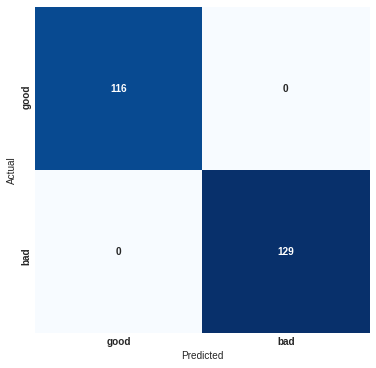

In [ ]:
cm = confusion_matrix(y_test,predicted_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, xticklabels=listlabels, yticklabels=listlabels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
test_good_data[0]

[array([[[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        ...,
 
        [[12, 12, 12],
         [13, 13, 13],
         [14, 14, 14],
         ...,
         [18, 18, 18],
         [17, 17, 17],
         [18, 18, 18]],
 
        [[13, 13, 13],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [18, 18, 18],
         [18, 18, 18]],
 
        [[12, 12, 12],
         [13, 13, 13],
         [13, 13, 13],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]]], dtype=uint8), 0]

In [ ]:
test_good_images=[]
test_good_labels=[]
for i in test_good_data:
  test_good_images.append(i[0])
  test_good_labels.append(i[1])


In [ ]:
test_good_images[0]

array([[[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [18, 18, 18]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       ...,

       [[12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        ...,
        [18, 18, 18],
        [17, 17, 17],
        [18, 18, 18]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [18, 18, 18],
        [18, 18, 18]],

       [[12, 12, 12],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [17, 17, 17],
        [17, 17, 17],
        [18, 18, 18]]], dtype=uint8)

In [ ]:
test_good_labels[0]

0

In [ ]:
test_good_ary=np.array(test_good_images)
test_good_ary=test_good_ary/255

In [ ]:
y_predict_good = cnn_classifier.predict(test_good_ary)
predicted_class_good = [np.argmax(element) for element in y_predict_good]

In [ ]:
cm = confusion_matrix(test_good_labels,predicted_class_good)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, xticklabels=listlabels, yticklabels=listlabels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# import the necessary packages
#import config
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights = "imagenet", include_top=False, input_tensor=Input(shape=(125,512, 3)))

# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False

# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(256, activation="relu")(bboxHead)
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid")(bboxHead)

# construct the model we will fine-tune for bounding box regression
model = Model(inputs=vgg.input, outputs=bboxHead)

In [ ]:
imagedata_boundingbox_array=np.array(imagedata_boundingbox)
imagedata_boundingbox_array=imagedata_boundingbox_array/255

In [ ]:
coordinates_boundingbox_array=np.array(coordinates_boundingbox)

In [ ]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(imagedata_boundingbox_array,coordinates_boundingbox_array, test_size = 0.20, random_state = 126)

In [ ]:
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr = 0.05)
model.compile(loss="mse", optimizer=opt)
print(model.summary())

# train the network for bounding box regression
print("[INFO] training bounding box regressor...")
H = model.fit(x_reg_train, y_reg_train, validation_data=(x_reg_test, y_reg_test), epochs = 5, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 125, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 125, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 125, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 62, 256, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 62, 256, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 62, 256, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 31, 128, 128)      0   